[*********************100%%**********************]  1 of 1 completed


<AxesSubplot:title={'center':'AAPL Stock Price'}, xlabel='Date'>

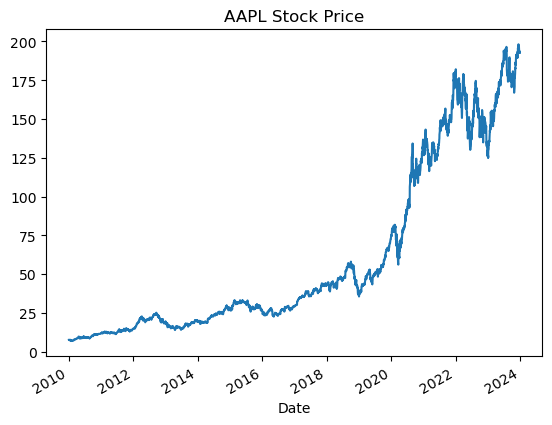

In [1]:
import yfinance as yf

# Download historical data for Apple stock
data = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
data['Close'].plot(title="AAPL Stock Price")


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Create a function to create the dataset with lookback
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Assume we are using the previously defined create_dataset function

# Define the split point
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Create the training and testing datasets
X_train, y_train = create_dataset(train, 60)
X_test, y_test = create_dataset(test, 60)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# Define the LSTM model
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Summarize the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
87/87 [==============================] - 10s 41ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 2/50
87/87 [==============================] - 4s 41ms/step - loss: 5.7221e-05 - accuracy: 0.0000e+00
Epoch 3/50
87/87 [==============================] - 4s 42ms/step - loss: 5.7606e-05 - accuracy: 0.0000e+00
Epoch 4/50
87/87 [==============================] - 4s 41ms/step - loss: 5.1140e-05 - accuracy: 0.0000e+00
Epoch 5/50
87/87 [==============================] - 4s 40ms/step - loss: 4.9981e-05 - accuracy: 0.0000e+00
Epoch 6/50
87/87 [==============================] - 4s 50ms/step - loss: 4.7645e-05 - accuracy: 0.0000e+00
Epoch 7/50
87/87 [==============================] - 4s 45ms/step - loss: 5.0044e-05 - accuracy: 0.0000e+00
Epoch 8/50
87/87 [==============================] - 5s 53ms/step - loss: 4.3126e-05 - accuracy: 0.0000e+00
Epoch 9/50
87/87 [==============================] - 4s 46ms/step - loss: 4.0355e-05 - accuracy: 0.0000e+00
Epoch 10/50
87/87 [=====================

21/21 [==============================] - 2s 14ms/step


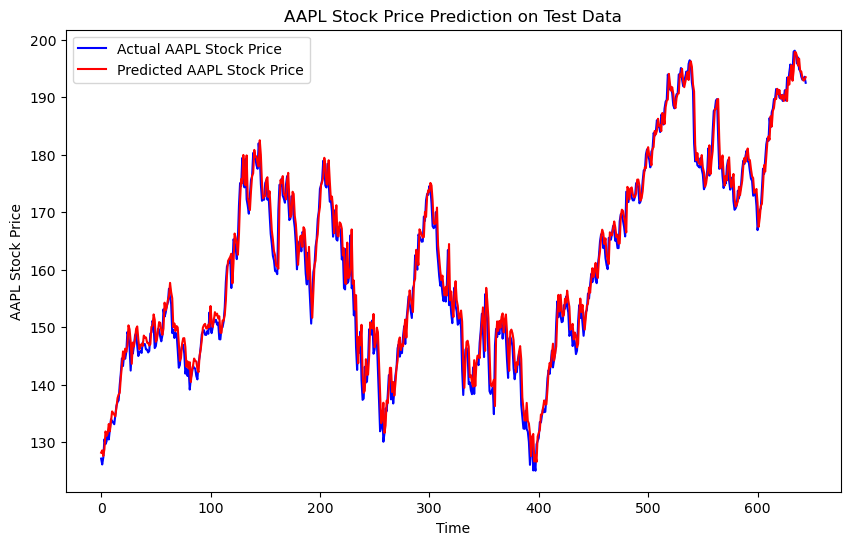

In [5]:
import matplotlib.pyplot as plt
# Predicting the stock prices using the test data
predicted_stock_price_test = model.predict(X_test)
predicted_stock_price_test = scaler.inverse_transform(predicted_stock_price_test)

# Actual stock prices (unseen)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the predictions against the true values
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='blue', label='Actual AAPL Stock Price')
plt.plot(predicted_stock_price_test, color='red', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction on Test Data')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()


1/1 [==============================] - 0s 28ms/step
Future Predictions for the Next 3 Days:
Day 1: 192.39
Day 2: 192.29
Day 3: 192.22
Day 4: 192.15
Day 5: 192.08
Day 6: 192.01
Day 7: 191.95
Day 8: 191.88
Day 9: 191.82
Day 10: 191.76
Day 11: 191.70
Day 12: 191.65
Day 13: 191.60
Day 14: 191.55
Day 15: 191.50
Day 16: 191.45
Day 17: 191.40
Day 18: 191.36
Day 19: 191.32
Day 20: 191.28
Day 21: 191.24
Day 22: 191.20
Day 23: 191.17
Day 24: 191.14
Day 25: 191.10
Day 26: 191.07
Day 27: 191.04
Day 28: 191.01
Day 29: 190.99
Day 30: 190.96
Day 31: 190.93
Day 32: 190.91
Day 33: 190.88
Day 34: 190.86
Day 35: 190.84
Day 36: 190.82
Day 37: 190.80
Day 38: 190.78
Day 39: 190.76
Day 40: 190.74
Day 41: 190.73
Day 42: 190.71
Day 43: 190.69
Day 44: 190.68
Day 45: 190.67
Day 46: 190.65
Day 47: 190.64
Day 48: 190.62
Day 49: 190.61
Day 50: 190.60
Day 51: 190.59
Day 52: 190.58
Day 53: 190.57
Day 54: 190.56
Day 55: 190.55
Day 56: 190.54
Day 57: 190.53
Day 58: 190.52
Day 59: 190.51
Day 60: 190.51
Day 61: 190.50
Da

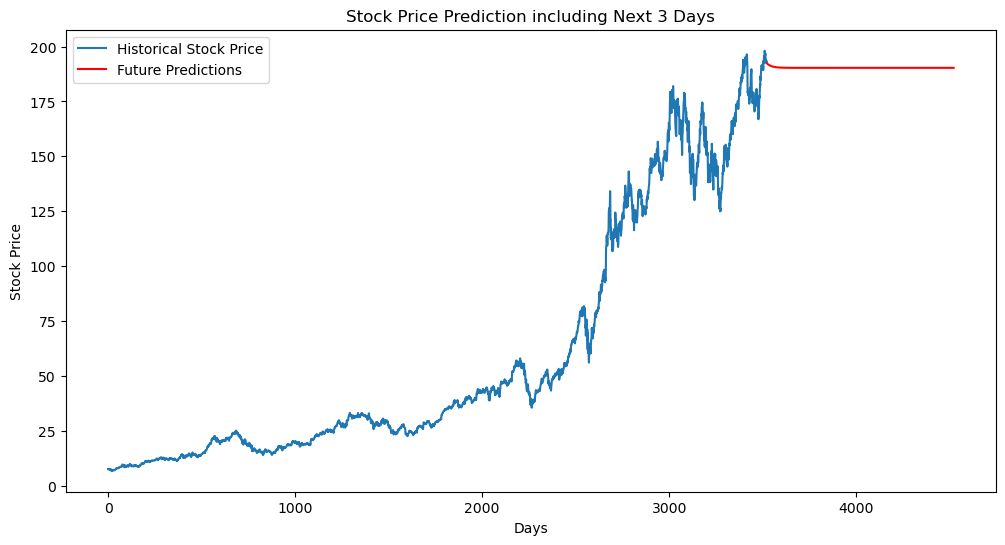

In [13]:
def predict_next_days(model, recent_data, days=3, look_back=60):
    recent_data = recent_data.reshape((1, look_back, 1))
    predictions = []
    for _ in range(days):
        # Predicting the next day's price based on the current look_back window
        pred = model.predict(recent_data)[0, 0]  # This gets us the single value predicted
        predictions.append(pred)
        
        # Appending the predicted value for next prediction cycle and removing the oldest value
        recent_data = np.append(recent_data[:, 1:, :], [[[pred]]], axis=1)
    
    return np.array(predictions)

prediction_dates = 1000

# Predicting future prices
recent_data = data_scaled[-60:]  # Last 60 days data
future_predictions = predict_next_days(model, recent_data, days=prediction_dates)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Display the predictions for the next 3 days
print("Future Predictions for the Next 3 Days:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: {price[0]:.2f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(data_scaled)), scaler.inverse_transform(data_scaled), label='Historical Stock Price')
future_days = np.arange(len(data_scaled), len(data_scaled) + prediction_dates)
plt.plot(future_days, future_predictions, color='red', label='Future Predictions')
plt.title('Stock Price Prediction including Next 3 Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
